In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r'../../results/strategies-simulation-optimized-variables-v02.csv', low_memory=False)

In [3]:
df_plot=df.copy()

In [4]:
# Parsing the Variable into separate columns
df_plot['Powertrain'] = df_plot['Variable'].apply(lambda x: x.split('[')[0])  # Bus type
df_plot['Capacity'] = df_plot['Variable'].apply(lambda x: x.split('[')[1].split(',')[0])  # Capacity
df_plot['Year'] = df_plot['Variable'].apply(lambda x: int(x.split(',')[1].split(']')[0]))  # Year

# Only keep rows that have "BusType" as y_CDB, y_HEB, or y_BEB
df_plot = df_plot[df_plot['Powertrain'].isin(['y_CDB', 'y_HEB', 'y_BEB'])]

# Group by Year and BusType, sum the values
grouped_df = df_plot.groupby(['Year', 'Powertrain']).sum(numeric_only=True).reset_index()

# Pivot the data to have BusType as columns and their respective values
pivot_df = grouped_df.pivot(index='Year', columns='Powertrain', values='Value')

# Convert values to percentages and scale to 0-100
pivot_df = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Rename columns for the legend
pivot_df.rename(columns={'y_BEB': 'BEB', 'y_HEB': 'HEB', 'y_CDB': 'CDB'}, inplace=True)

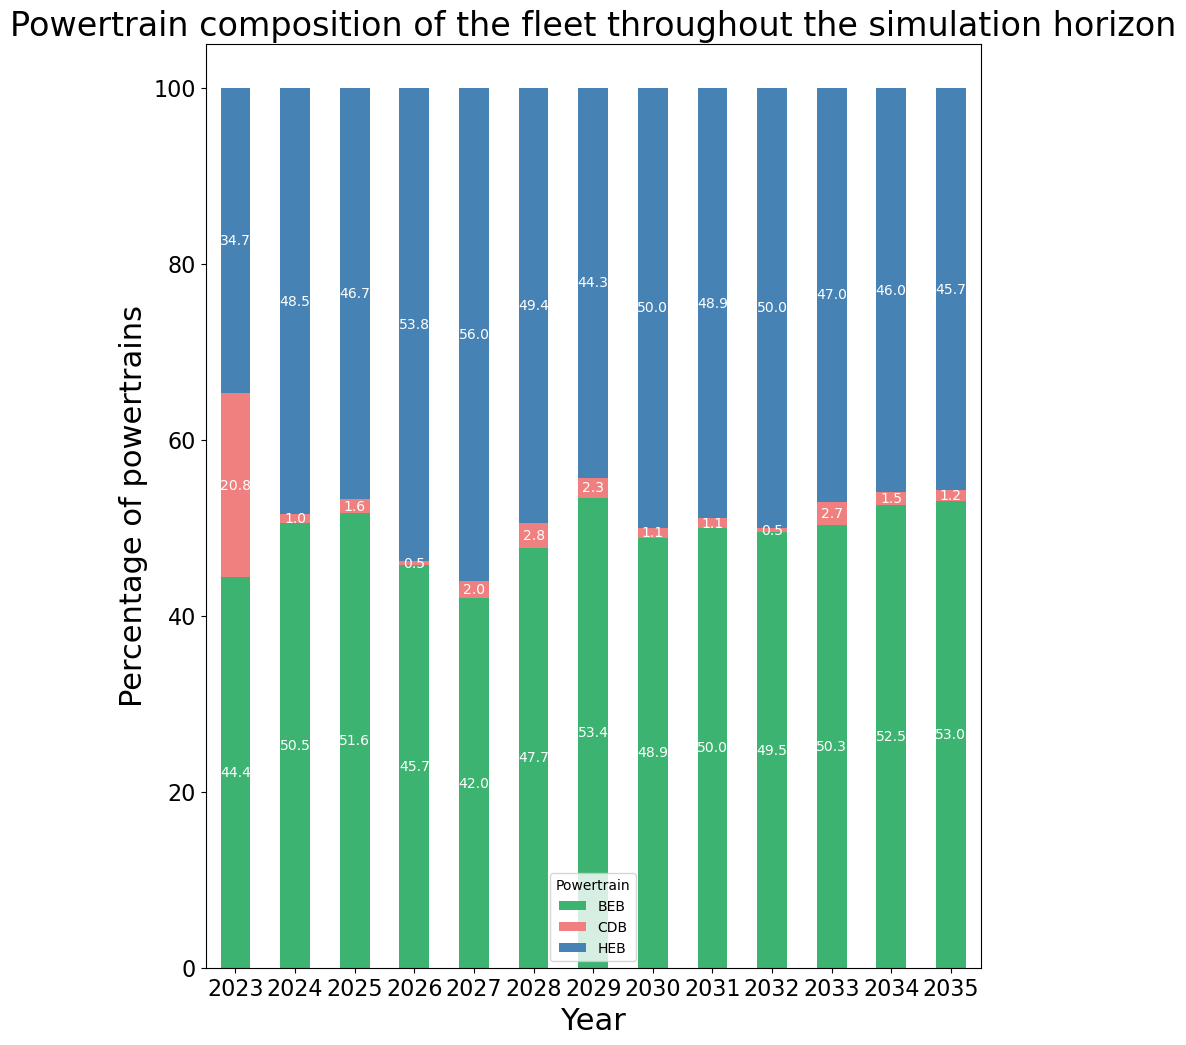

In [5]:
# Define colors
colors = {'BEB': 'mediumseagreen', 'HEB': 'steelblue', 'CDB': 'lightcoral'}

# Increase the size of the plot
fig, ax = plt.subplots(figsize=(10,12))

# Create the stacked bar plot
pivot_df.plot(kind='bar', stacked=True, color=[colors[col] for col in pivot_df.columns], ax=ax)

# Add percentage labels to each bar, remove the '%' sign
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height),  # remove the '%' sign
            horizontalalignment='center', 
            verticalalignment='center',
            color = 'white', # makes the text easier to read
            fontsize = 10)   # increase the font size

# Set x-axis ticks and labels
ax.set_xticks(range(13))
ax.set_xticklabels(range(2023, 2036), rotation='horizontal')

# Increase the size of x and y axis indices
ax.tick_params(axis='x', labelsize=16) 
ax.tick_params(axis='y', labelsize=16)

# Set the title and labels with increased font sizes
ax.set_title("Powertrain composition of the fleet throughout the simulation horizon", fontsize=24)
ax.set_xlabel("Year", fontsize=22)
ax.set_ylabel("Percentage of powertrains", fontsize=22)  

plt.show()


In [38]:
df_objective = pd.read_csv(r'../../results/variable_coefficients.csv', low_memory=False)

In [39]:
df

,Variable,Value
0,"x_CDB[low-cap,0,0,528277]",0.0
1,"x_CDB[low-cap,0,0,528282]",0.0
2,"x_CDB[low-cap,0,0,528283]",0.0
3,"x_CDB[low-cap,0,0,528286]",0.0
4,"x_CDB[low-cap,0,0,528288]",0.0
...,...,...
93990034,"z_BEB[low-cap,999,8]",0.0
93990035,"z_BEB[low-cap,999,9]",0.0
93990036,"z_BEB[low-cap,999,10]",0.0
93990037,"z_BEB[low-cap,999,11]",0.0


In [40]:
df_objective

,Variable,Coefficient
0,"('low-cap', 0, 0, 528277)",2.117975
1,"('low-cap', 0, 1, 528277)",2.117975
2,"('low-cap', 0, 2, 528277)",2.117975
3,"('low-cap', 0, 3, 528277)",2.117975
4,"('low-cap', 0, 4, 528277)",2.117975
...,...,...
93950995,"('low-cap', 999, 8, 507069)",0.000000
93950996,"('low-cap', 999, 9, 507069)",0.000000
93950997,"('low-cap', 999, 10, 507069)",0.000000
93950998,"('low-cap', 999, 11, 507069)",0.000000


In [ ]:
# Splitting Variable column and extracting variable type and dimensions
df['var_type'] = df['Variable'].str.split('_', expand=True)[0]
df['dimensions'] = df['Variable'].str.split('[', expand=True)[1].str.replace(']','')

# Split dimensions into separate columns
df[['dim1', 'dim2', 'dim3', 'dim4']] = df['dimensions'].str.split(',', expand=True)

# Convert numerical dimensions to int type, while keeping non-numeric dimensions
for dim in ['dim2', 'dim3', 'dim4']:
    df[dim] = pd.to_numeric(df[dim], errors='coerce')

# Create separate dataframes for x, y and z
df_x = df[df['var_type'] == 'x']
df_y = df[df['var_type'] == 'y']
df_z = df[df['var_type'] == 'z']

In [ ]:
# Create a pivot table for the 'x' , 'y', 'z' dataframes
pivot_x = df_x.pivot_table(values='Value', index=['dim1', 'dim2', 'dim3', 'dim4'])
pivot_y = df_y.pivot_table(values='Value', index=['dim1', 'dim2'])
pivot_z = df_z.pivot_table(values='Value', index=['dim1', 'dim2', 'dim3'])

In [ ]:
# Processing 'Variable' column in df_objective
df_objective['Variable'] = df_objective['Variable'].apply(lambda x: 'x_CDB' + str(x).replace(' ', '').replace('(','[').replace(')',']'))

# Merge df_x and df_objective
df_x = pd.merge(df_x, df_objective, on='Variable', how='left')

# Rename 'Coefficient' column to something more meaningful
df_x.rename(columns={'Coefficient': 'x_coefficient'}, inplace=True)

# Create updated pivot table
pivot_x = df_x.pivot_table(values=['Value', 'x_coefficient'], index=['dim1', 'dim2', 'dim3', 'dim4'])

In [ ]:
pivot_x

In [ ]:
pivot_y

In [ ]:
pivot_z